In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:

!ls "/content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS"

m_modes_5  n_modes_5


In [2]:
!unzip '/content/drive/My Drive/GW_Dataset_2023/dir.zip' -d '/content/drive/My Drive/GW_Dataset_2023/Dataset_mid/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/n_modes_5/class_2/09628_HG_1_2_0.65_n12_p15.png  
  inflating: /content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/n_modes_5/class_2/01057_HG_1_2_0.73_n18_p08.png  
  inflating: /content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/n_modes_5/class_2/09522_HG_2_2_0.60_n19_n10.png  
  inflating: /content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/n_modes_5/class_2/04214_HG_3_2_0.68_n18_p07.png  
  inflating: /content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/n_modes_5/class_2/04414_HG_1_2_0.68_n11_p13.png  
  inflating: /content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/n_modes_5/class_2/02926_HG_2_2_0.78_p01_n05.png  
  inflating: /content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/n_modes_5/class_2/01713_HG_4_2_0.67_n01_p13.png  
  inflating: /content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/n_modes_5/class_2/05346_HG_4_2_0.65_n17

In [3]:
import os
len(os.listdir('/content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/m_modes_5/class_1'))

1952

In [1]:
import os
import shutil
import numpy as np
import cv2
import matplotlib.pyplot as plt

(128, 128, 3)


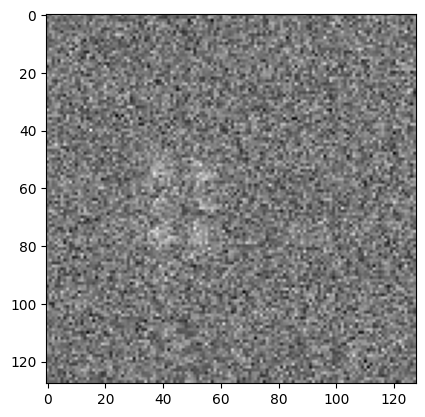

In [16]:
m_class_0_file_names = os.listdir('/content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/m_modes_5/class_0')
m_class_1_file_names = os.listdir('/content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/m_modes_5/class_1')
m_class_2_file_names = os.listdir('/content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/m_modes_5/class_2')
m_class_3_file_names = os.listdir('/content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/m_modes_5/class_3')
m_class_4_file_names = os.listdir('/content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/m_modes_5/class_4')
m_class_5_file_names = os.listdir('/content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/m_modes_5/class_5')


img_file = cv2.imread(os.path.join('/content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/m_modes_5/class_1',m_class_1_file_names[0]))
print(img_file.shape)
plt.imshow(img_file)

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
# Define constants
image_height = 128
image_width = 128
batch_size = 256
num_classes = 5
epochs = 10

In [19]:
# Data paths
train_data_dir = '/content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/m_modes_5/'

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values between 0 and 1
    # rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    horizontal_flip=False,
    validation_split=0.2  # Splitting data into training/validation
)

In [20]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 8002 images belonging to 6 classes.
Found 1998 images belonging to 6 classes.


In [ ]:
# Create CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# # Save the trained model
# model.save('multi_class_image_classification_model.h5')

In [ ]:
#model.save('m_mode_2_class_image_classification_model.h5')

In [ ]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
def preprocess_image(img_path):
    img_array = cv2.imread(img_path)

    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [ ]:
img_path = os.path.join('/content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/m_modes_5/class_0',m_class_0_file_names[5000])
img_arr = preprocess_image(img_path)
# Make predictions
predictions = model.predict(img_arr)
# predicted_class = np.argmax(predictions)
predictions

In [ ]:
# Data paths
test_data_dir = '/content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/m_modes_5/'

# Data preprocessing and augmentation
test_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values between 0 and 1
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    validation_split=0.2  # Splitting data into training/validation
)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
test_generator.labels

In [ ]:
# Make predictions on test data
num_samples = test_generator.samples
y_true = test_generator.labels
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=-1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Compute precision, recall, and F1-score
report = classification_report(y_true, y_pred_classes)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

In [ ]:
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()

N Mode Classification Network

In [ ]:
#!unzip '/content/drive/My Drive/GWDATASET/n_dataset.zip' -d '/content/drive/My Drive/GWDATASET/'

In [ ]:
import os
#len(os.listdir('/content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/n_modes_5/class_1'))

In [ ]:
n_class_0_file_names = os.listdir('/content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/n_modes_5/class_0')
n_class_1_file_names = os.listdir('/content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/n_modes_5/class_1')
n_class_2_file_names = os.listdir('/content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/n_modes_5/class_2')
n_class_3_file_names = os.listdir('/content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/n_modes_5/class_3')
n_class_4_file_names = os.listdir('/content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/n_modes_5/class_4')
n_class_5_file_names = os.listdir('/content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/n_modes_5/class_5')

img_file = cv2.imread(os.path.join('/content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/n_modes_5/class_2',n_class_2_file_names[1]))
print(img_file.shape)
plt.imshow(img_file)

In [ ]:
# Data paths
n_train_data_dir = '/content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/n_modes_5'

# Data preprocessing and augmentation
n_train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values between 0 and 1
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    validation_split=0.2  # Splitting data into training/validation
)

In [ ]:
n_train_generator = n_train_datagen.flow_from_directory(
    n_train_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

n_validation_generator = n_train_datagen.flow_from_directory(
    n_train_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


In [4]:
# Create CNN model
n_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [5]:
n_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [ ]:


# Compile the model
n_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_n = n_model.fit(
    n_train_generator,
    steps_per_epoch=n_train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=n_validation_generator,
    validation_steps=n_validation_generator.samples // batch_size
)

# # Save the trained model
# model.save('multi_class_image_classification_model.h5')

In [ ]:
#n_model.save('n_mode_2_class_image_classification_model.h5')

In [ ]:
print(history_n.history.keys())
plt.ylim(0, 1)

plt.plot(history_n.history['accuracy'])
plt.plot(history_n.history['val_accuracy'])

In [ ]:
plt.plot(history_n.history['loss'])
plt.ylim(0,)
plt.plot(history_n.history['val_loss'])

In [ ]:
# for file_name in n_class_0_file_names:
#     img_path = os.path.join('/content/drive/My Drive/GWDATASET/n_dataset/class_0',file_name)
#     img_arr = preprocess_image(img_path)
#     print(model.predict(img_arr))

In [ ]:
file_name = n_class_0_file_names[4579]
img_path = os.path.join('/content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/n_modes_5/class_0/',file_name)
print(file_name)
img_arr = preprocess_image(img_path)
img_file = cv2.imread(img_path)
plt.imshow(img_file)
# Make predictions
predictions_m = model.predict(img_arr)
predictions_n = n_model.predict(img_arr)
# predicted_class = np.argmax(predictions)
print(predictions_m)
print(predictions_n)

In [ ]:
#Data paths
n_test_data_dir = '/content/drive/My Drive/GW_Dataset_2023/Dataset_mid/GWDS/n_modes_5'

# Data preprocessing and augmentation
n_test_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values between 0 and 1
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    validation_split=0.2  # Splitting data into training/validation
)

In [ ]:
n_test_generator = n_test_datagen.flow_from_directory(
    n_test_data_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
)

In [ ]:
# Make predictions on test data
num_samples = n_test_generator.samples
y_true_n = n_test_generator.labels
y_pred_n = n_model.predict(n_test_generator)
y_pred_classes_n = np.argmax(y_pred, axis=-1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_n, y_pred_classes_n)

# Compute precision, recall, and F1-score
report = classification_report(y_true_n, y_pred_classes_n)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

In [ ]:
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()